# Ecuación de Legendre

## Introducción

Dada la ecuación de Sturm–Liouville 
 \begin{align}
{d\over dx}\left[p(x){d\over dx}y(x)\right]-q(x)y(x)+\lambda r(x)y(x)=0
\end{align}

Con las condiciones de frontera:

 \begin{align}
\alpha_1 y(a)+\alpha_2 y'(a)=0\\ 
\beta_1y(b)+\beta_2 y'(b)=0 
\end{align}

donde $a<x<b$ 

Podemos obtener la **ecuación de diferencial de Legendre**: 
\begin{align}
\\ \frac{d}{dx}\left[1-x^2\frac{dy}{dx}\right]+n(n+1)y=0
\end{align}

donde:

\begin{align}
p(x)&=1-x^2&
 q(x)&=0\\
r(x)&=1&
\lambda&=n(n+1)
\end{align}

con
$-1\leq x \leq1$ 

A continuación escribiremos la ecuación en su forma más usual. 

Como $y'=\frac{dy}{dx}$
\begin{align}
\\ \frac{d}{dx}\left[1-x^2y'\right]+n(n+1)y=0
\end{align}

Usando a la fórmula del producto de derivadas en el término $\frac{d}{dx}\left[1-x^2y'\right]$:

\begin{align}
\\f'=u'v+v'u
\end{align}

\begin{align}
u&=1-x^2&
v&=y'\\
u'&=-2x&
v'&=y''
\end{align}

entonces

\begin{align}
\\\frac{d}{dx}\left[xy'\right]=-2xy'+y''(1-x^2)= (1-x^2)y''-2xy'
\end{align}

Sustituyendo en la ecuación obtenemos:

\begin{align}
\\ (1-x^2)y''-2xy'+n(n+1)y=0
\end{align}

## Soluciones

# Relación de recurrencia

Los polinomios de Legendre pueden construirse usando la relación de recurrencia:

Donde los primeros dos términos son: 
\begin{align}
\\ P_{0} = 1
\\ P_{1} = x
\end{align}

\begin{align}
\\ (n+1) P_{n+1} = (2n+1) x P_n - n P_{n-1}
\end{align}

Entonces

\begin{align}
\\ P_{n+1} = \frac{1}{(n+1)}\left[(2n+1) x P_n - n P_{n-1}\right]
\end{align}


Para calcular $P_{n}$ debemos modificar la expresión anterior de la siguiente forma: 

\begin{align}
\\ P_{n} = \frac{1}{n}\left[(2(n-1)+1) x P_{n-1} - (n-1) P_{n-2}\right]
\end{align}

Por ejemplo, si queremos calcular $P_{2}$:

\begin{align}
\\ P_{2}& = \frac{1}{2}\left[(2(2-1)+1) x P_{2-1} - (2-1) P_{2-2}\right]&\\
 P_{2}& = \frac{1}{2}\left[(2(1)+1) x P_{1} - (1) P_{0}\right]&\\
 P_{2}& = \frac{1}{2}\left[3 x P_{1} - P_{0}\right]&
\end{align}

Donde $P_{0}$ y $P_{1}$ son términos conocidos y $x$ es el punto de evaluación del polinomio.

En Julia, teniendo un vector $v=[9,8,7,6,5]$, el término $v[0]$ no está definido, pues la numeración de los elementos del vector inicia en $1$. De este modo, Julia tendrá definido $v[1]=9$

Con base en lo anterior, si contruimos un vector $p$ tal que $p=[P_{0},P_{1},P_{2},...,P_{n}]$ tendremos:

\begin{align}
\\ p[1] = P_{0}
\\ p[2]= P_{1}
\end{align}

y en general

\begin{align}
\\ p[n] = P_{n-1}
\end{align}

Por lo tanto, debemos modificar la relación de recurrencia para obtener $P_{n-1}$

\begin{align}
\\ P_{n-1} = \frac{1}{(n-1)}\left[(2(n-2)+1) x P_{n-2} - (n-2) P_{n-3}\right]
\end{align}


En términos del vector $p$:

\begin{align}
\\ p[n] = \frac{1}{(n-1)}\left[(2(n-2)+1) x p[n-1] - (n-2) p[n-2]\right]
\end{align}

la cual, es la fórmula que utilizaremos en el programa.

Si queremos calcular $P_{2}$, esto es:
\begin{align}
\\ p[3] = P_{2}
\end{align}

de donde vemos que $n=3$

Aplicando la relación de recurrencia: 

\begin{align}
\\ P_{3-1} &= \frac{1}{(3-1)}\left[(2(3-2)+1) x P_{3-2} - (3-2) P_{3-3}\right]&
\\ P_{2} &= \frac{1}{2}\left[(2(1)+1) x P_{1} - (1) P_{0}\right]&
\\ P_{2} &= \frac{1}{2}\left[3 x P_{1} - P_{0}\right]&
\end{align}

Por otro lado, en términos del vector $p$:

\begin{align}
\\ p[3] &= \frac{1}{2}\left[(2(1)+1) x p[2] - (1) p[1]\right]&
\\ p[3] &= \frac{1}{2}\left[3 x p[2] - p[1]\right]&
\end{align}

Como

\begin{align}
\\ p[1] = P_{0} =1
\\ p[2]= P_{1} = x
\end{align}

\begin{align}
\\ P_{2} &= \frac{1}{2}\left[3 x^2 - 1\right]&
\end{align}
o bien

\begin{align}
\\ p[3] &= \frac{1}{2}\left[3 x^2 - 1\right]&
\end{align}

## Código

In [2]:
using PyPlot
#using Formatting

In [3]:
function p_legendre(m,x)
    
    n=m+1
    p=zeros(n)
    
   p[1]=1
   p[2]=x
    
    if n==1
        
        return p[1]
        
    elseif n==2
        
        return p[2]
        
    else
    
        for i=3:n
            p[i]=((2(i-2)+1)*x*p[i-1]-(i-2)p[i-2])/(i-1)
            #p[i]=(((2*i))*x*p[i-1]-(i-1)*p[i-2])/(i+1)
        end

        return p
    end
    
    
    
end    

p_legendre (generic function with 1 method)

### Pruebas 

In [3]:
p_legendre(2,0)

3-element Array{Float64,1}:
  1.0
  0.0
 -0.5

In [4]:
p_legendre(2,8)

3-element Array{Float64,1}:
  1.0
  8.0
 95.5

### Gráfica

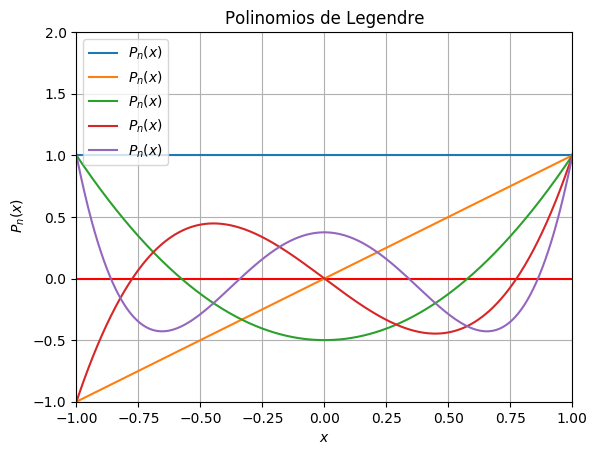

In [5]:
#Conjuntos de datos
x = linspace(-1.5, 1.5, 1000)
n=4
y=[]
for i=1:length(x)
    yy= p_legendre(n,x[i])
    y=push!(y,yy)        
end 

#Gráfica

fig,ax = subplots()
ax[:set_ylim](-1, 2.0)
ax[:set_xlim](-1, 1.0)
title("Polinomios de Legendre")#Título de la gráfica
xlabel("\$x\$") #Etiqueta para el eje X
ylabel(" \$P_n (x)\$")#Etiqueta para el eje Y
 
axhline(0, color="red") 
grid()

plot(x,y,label="\$P_{n}(x)\$") #label=r"$P_{}(x)$".format(n)
 
legend(loc="best")
show()

# Aplicación 1

Los polinomios de Legendre tienen aplicación en la mecánica cuántica. A continuación se presenta el esquema del desarrollo que llevaremos a cabo para mostrar la relación de los polinomios con los armónicos esféricos [3].

* Obtendremos la ecuación de Schrödinger independiente del tiempo en coordenadas esféricas.
* En estás coordenadas la función de onda dependerá de $r$,$\theta$ y $\phi$, por lo que aplicarémos el método de separción de variables con el objetivo de expresar la ecuación de Schrödinger como la suma de una parte radial (dependiendo de $r$ con $R(r)$) más una parte angular (que depende de $\theta$ y $\phi$ con $Y(\theta,\phi)$). Convenientemente esto dará lugar a una expresión en términos de $l$ (número cuántico orbital). 
* La parte angular de la ecuación de Schrödinger tiene la función $Y(\theta,\phi)$. Por lo cual, aplicaremos  nuevamente el método de separación de variables para expresar la parte angular como la suma de una parte que depende de $\theta$ (con la función $\Theta(\theta)$) y otra que depende de $\phi$ (con la función $\Phi(\phi)$).
* Obtendremos las soluciones (expresión explícita) de cada una de las funciones obtenidas: $R(r)$, $\Theta(\theta)$ y $\Phi(\phi)$
* La solución para la parte que depende de $\phi$ será:
\begin{align}
\\ \Phi(\phi) &= e^{im\phi}&
\end{align}
* La solución para la parte que depende de $\theta$ será:
\begin{align}
\\ \Theta(\theta) &= AP^{m}_l(cos(\theta))&
\end{align}

Con $P^{m}_l(x)\equiv(1-x^2)^{ \frac{\left | m \right |}{2}} \left(\frac{d}{dx} \right)^{\left | m \right |}P_l(x)$ 

Donde $P_l$ es el polinomio de Legendre de $l$-ésimo grado. 
* La solución para la parte que depende de $r$ será:
\begin{align}
\\ R(r) &= Ae^{\frac{r}{a_0}}&
\end{align}
* A partir de las soluciones angulares $\Theta(\theta)$ y $ \Phi(\phi)$ obtenemos la solución a la parte angular $Y(\theta,\phi)$:
\begin{align}
\\ Y^{m}_l(\theta,\phi) &=\epsilon \sqrt{\frac{(2i+1)(l-\left | m \right |)!}{4\pi(l+\left | m \right |)!}}e^{im\phi}P^{m}_l(cos(\theta))&
\end{align}

la cual, da lugar a los **armónicos esféricos**.

Con $\epsilon=(-1)^m$, conocida como fase de Condon-Shortley [4]

* Implementaremos en Julia las gráficas de los **armónicos esféricos**.


---

La ecuación de Schrödinger independiente del tiempo es:

\begin{align}
\\ -\frac{\hbar}{2m}\frac{d^2\psi}{dx^2}+V\psi=E\psi
\end{align}

En tres dimenciones, se escribe de la siguiente forma:

\begin{align}
\\ -\frac{\hbar}{2m}\left[\frac{d^2\psi}{dx^2}+\frac{d^2\psi}{dy^2}+\frac{d^2\psi}{dz^2}\right]+V\psi=E\psi
\end{align}

Podemos simplificala usando el **operador laplaciano**, el cual se define como:

\begin{align}
\\ \nabla^2f=\left[\frac{d^2f}{dx^2}+\frac{d^2f}{dy^2}+\frac{d^2f}{dz^2}\right]
\end{align}

Sustituyendo en la expresión anterior: 

\begin{align}
\\ -\frac{\hbar}{2m}\nabla^2\psi+V\psi=E\psi
\end{align}

Ahora debemos cambiar el operador lapaciano a coordenadas esféricas. Este procedimiento es algo largo, por lo que se incluirá en un anexo en futuras versiones, por lo pronto, puede consultarse una demostración parcial en la referencia [11]

El operador, aplicado a alguna función $f$, en coordenadas esféricas es:
\begin{align}
\nabla^2 f = {1 \over r^2} {\partial \over \partial r}\left( r^2 {\partial f \over \partial r} \right) + {1 \over r^2 \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial f \over \partial \theta} \right) + {1 \over r^2 \sin^2 \theta} {\partial^2 f \over \partial \phi^2}
\end{align}

Haciendo $f=\psi$ y sustituyendo:

\begin{align}
-\frac{\hbar^2}{2m}\left[ {1 \over r^2} {\partial \over \partial r}\left( r^2 {\partial \psi \over \partial r} \right) + {1 \over r^2 \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial \psi \over \partial \theta} \right) + {1 \over r^2 \sin^2 \theta} {\partial^2 \psi \over \partial \phi^2}\right]+V\psi=E\psi
\end{align}

Esta es la ecuación de Schrödinger en coordenadas esféricas.

----

Ahora la función $\psi$ depende de $r$,$\theta$ y $\phi$, esto es $\psi(r,\theta,\psi)$. Con el método de separación de variables(ver anexo) podemos expresar $\psi$ como el producto de dos funciones, una que depende de $r$ y otra que depende de los ángulos $\theta$ y $\phi$.

\begin{align}
\psi(r,\theta,\psi)=R(r)Y(\theta,\phi)
\end{align}

recordemos que la finalidad de esto es expresar la ecuación de Schrödinger como la suma de una parte radial  más una parte angular. 

Nota: Para simplificar las operaciones que siguen, escribiremos $R$ y $Y$ para referirnos a $R(r)$ y $Y(\theta,\phi)$.

Sustituyendo en la ecuación de Schrödinger obtenemos:

\begin{align}
-\frac{\hbar^2}{2m}\left[ {1 \over r^2} {\partial \over \partial r}\left( r^2 {\partial RY \over \partial r} \right) + {1 \over r^2 \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial RY \over \partial \theta} \right) + {1 \over r^2 \sin^2 \theta} {\partial^2 RY \over \partial \phi^2}\right]+VRY=ERY
\end{align}

desarrollando:

\begin{align}
-\frac{\hbar^2}{2m}\left[ {Y \over r^2} {\partial \over \partial r}\left( r^2 {\partial R \over \partial r} \right) + {R \over r^2 \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right) + {R \over r^2 \sin^2 \theta} {\partial^2 Y \over \partial \phi^2}\right]+VRY=ERY
\end{align}

dividiendo entre $RY$:

\begin{align}
-\frac{\hbar^2}{2m}\left[ {1\over Rr^2} {\partial \over \partial r}\left( r^2 {\partial R \over \partial r} \right) + {1 \over Yr^2 \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right) + {1 \over Yr^2 \sin^2 \theta} {\partial^2 Y \over \partial \phi^2}\right]+V=E
\end{align}

\begin{align}
-\frac{\hbar^2}{2m}\left[ {1\over Rr^2} {\partial \over \partial r}\left( r^2 {\partial R \over \partial r} \right) + {1 \over Yr^2 \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right) + {1 \over Yr^2 \sin^2 \theta} {\partial^2 Y \over \partial \phi^2}\right]+(V-E)=0
\end{align}

multiplicando por $-\frac{2mr^2}{\hbar^2}$

\begin{align}
r^2\left[ {1\over Rr^2} {\partial \over \partial r}\left( r^2 {\partial R \over \partial r} \right) + {1 \over Yr^2 \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right) + {1 \over Yr^2 \sin^2 \theta} {\partial^2 Y \over \partial \phi^2}\right]+\left[-\frac{2mr^2}{\hbar^2} \right](V-E)=0
\end{align}

\begin{align}
\left[ {1\over R} {\partial \over \partial r}\left( r^2 {\partial R \over \partial r} \right) + {1 \over Y \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right) + {1 \over Y \sin^2 \theta} {\partial^2 Y \over \partial \phi^2}\right]-\left[\frac{2mr^2}{\hbar^2} \right](V-E)=0
\end{align}

\begin{align}
{1\over R} {\partial \over \partial r}\left( r^2 {\partial R \over \partial r} \right) + {1 \over Y \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right) + {1 \over Y \sin^2 \theta} {\partial^2 Y \over \partial \phi^2}-\frac{2mr^2}{\hbar^2}(V-E)=0
\end{align}

Agrupamos de acuerdo a las variables:

\begin{align}
{1\over R} {\partial \over \partial r}\left( r^2 {\partial R \over \partial r} \right) -\frac{2mr^2}{\hbar^2} (V-E)+ {1 \over Y \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right) + {1 \over Y \sin^2 \theta} {\partial^2 Y \over \partial \phi^2}=0
\end{align}

despejando $\frac{1}{Y}$: 

\begin{align}
\left[{1\over R} {\partial \over \partial r}\left( r^2 {\partial R \over \partial r} \right) -\frac{2mr^2}{\hbar^2} (V-E)\right]+ \frac{1}{Y}\left[{1 \over \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right)+ {1 \over \sin^2 \theta} {\partial^2 Y \over \partial \phi^2}\right]=0
\end{align}

La primera parte de la suma de arriba depende solo de $r$, mientras que la segunda depende de $\theta$ y $\phi$, con lo que hemos logrado separar la ecuación de Schrodinger en una parte radial y otra angular.

NOTA: En algunos textos, la separación de variables la realizan por medio de tres funciones: $\psi(r,\theta,\psi)=R(r)\Theta(\theta)\Phi(\phi)$. En este texto no se hizo de esta forma pues se busca hacerlo "paso a paso".

A conveniencia, se hacen las siguientes relaciones: 

\begin{align}
\left[{1\over R} {\partial \over \partial r}\left( r^2 {\partial R \over \partial r} \right) -\frac{2mr^2}{\hbar^2} (V-E)\right]=l(l+1)
\\
\\
 \frac{1}{Y}\left[{1 \over \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right)+ {1 \over \sin^2 \theta} {\partial^2 Y \over \partial \phi^2}\right]=-l(l+1)
\end{align}

es decir:

\begin{align}
l(l+1)-l(l+1)=0
\end{align}

donde $l$ es el número cuántico orbital.

----

Antes de continuar con el siguiente paso debemos modificar la ecuación anterior, para ello, multiplicamos por $Ysin^2\theta$ a la parte angular:

\begin{align}
 Ysin^2\theta\left(\frac{1}{Y}\left[{1 \over \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right)+ {1 \over \sin^2 \theta} {\partial^2 Y \over \partial \phi^2}\right]\right)=-l(l+1) Ysin^2\theta
  \\
  \\
{ \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial Y \over \partial \theta} \right)+  {\partial^2 Y \over \partial \phi^2}=-l(l+1) Ysin^2\theta
\end{align}

Como la función solución $Y(\theta,\phi)$ depende de dos variables, aplicaremos nuevamente el método de separación de varibles:

\begin{align}
Y(\theta,\phi)=\Theta(\theta)\Phi(\phi)
\end{align}

\begin{align}
{ \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta(\theta)\Phi(\phi) \over \partial \theta} \right)+  {\partial^2 \Theta(\theta)\Phi(\phi) \over \partial \phi^2}=-l(l+1) \Theta(\theta)\Phi(\phi)sin^2\theta
\end{align}

\begin{align}
\Phi(\phi){ \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta(\theta) \over \partial \theta} \right)+ \Theta(\theta){\partial^2 \Phi(\phi)\over \partial \phi^2}=-l(l+1) \Theta(\theta)\Phi(\phi)sin^2\theta
\end{align}

dividiendo entre $\Theta(\theta)\Phi(\phi)$:

\begin{align}
\frac{1}{\Theta(\theta)}\left[{ \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta(\theta) \over \partial \theta} \right)\right]+\frac{1}{\Phi(\phi)}\left[{\partial^2 \Phi(\phi)\over \partial \phi^2}\right]=-l(l+1)sin^2\theta
\end{align}

agrupando de acuerdo a las variables:

\begin{align}
\left[\frac{1}{\Theta(\theta)}{ \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta(\theta) \over \partial \theta} \right)+l(l+1)sin^2\theta\right]+\frac{1}{\Phi(\phi)}\left[{\partial^2 \Phi(\phi)\over \partial \phi^2}\right]=0
\end{align}

\begin{align}
\left[\frac{1}{\Theta(\theta)}{ \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta(\theta) \over \partial \theta} \right)+l(l+1)sin^2\theta\right]=-\frac{1}{\Phi(\phi)}\left[{\partial^2 \Phi(\phi)\over \partial \phi^2}\right]
\end{align}

Como podemos observar, el lado derecho izquierdo de la igualdad depende sólo de $\Theta$ mientras que el lado izquierdo depende sólo de $\Phi$. La única forma en que la igualdad se pueda cumplir es que cada lado sea igual a una constante. Esta constante la asignaremos a conveniencia como $-m^2$, donde m represental el número cuántico magnético.

\begin{align}
\frac{1}{\Phi(\phi)}\left[{\partial^2 \Phi(\phi)\over \partial \phi^2}\right]=-m^2
\\
\left[\frac{1}{\Theta(\theta)}{ \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta(\theta) \over \partial \theta} \right)+l(l+1)sin^2\theta\right]=m^2
\end{align}  


----

Ahora tenemos 3 ecuaciones, correspondientes a cada una de las varibles $R,\Theta$ y $\Phi$.

\begin{align}
\left[{1\over R} {\partial \over \partial r}\left( r^2 {\partial R \over \partial r} \right) -\frac{2mr^2}{\hbar^2} (V-E)\right]=l(l+1)
\\
\left[\frac{1}{\Theta(\theta)}{ \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta(\theta) \over \partial \theta} \right)+l(l+1)sin^2\theta\right]=m^2
\\
\frac{1}{\Phi(\phi)}\left[{\partial^2 \Phi(\phi)\over \partial \phi^2}\right]=-m^2
\end{align}  
El siguiente paso será hallar sus soluciones. 

ECUACION POLAR
----
A continuación determinaremos una expresión para $\Theta$:

Tenemos que: 

\begin{align}
\left[\frac{1}{\Theta(\theta)}{ \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)+l(l+1)sin^2\theta\right]=m^2
\end{align}  

Nota: Escribimos $\Theta$ en vez de $\Theta(\theta)$ para facilitar las visualización y las operaciones.

modifiremos la ecuación para que tenga la forma de la ecuación de Legendre  [12][13]:

Multiplicamos por $\Theta$:

\begin{align}
{ \sin \theta} {\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)+\Theta l(l+1)sin^2\theta=\Theta m^2
\end{align}  

Multiplicamos por $\frac{1}{sin^2\theta}$

\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)+\Theta l(l+1)=\frac{\Theta m^2}{sin^2\theta}
\end{align}  

\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)-\frac{\Theta m^2}{sin^2\theta}+\Theta l(l+1)=0
\end{align}  

\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)+\left[-\frac{m^2}{sin^2\theta}+ l(l+1)\right]\Theta=0
\end{align}  

Debemos hacer el siguiente cambio de variable: $z=cos\theta$

Primero haremos el cambio de variabe para el primer término de la resta.
\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)
\end{align}  

Aplicamos la regla de la derivada del producto a ${\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)$
  
\begin{align}
{\partial \over \partial \theta}\left( \sin \theta {\partial \Theta \over \partial \theta} \right) = cos\theta{\partial \Theta \over \partial \theta} + sin\theta{\partial^2 \Theta \over \partial \theta^2}
\end{align}    
  
entonces   

\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)=\frac{1}{sin\theta}\left[cos\theta{\partial \Theta \over \partial \theta} + sin\theta{\partial^2 \Theta \over \partial \theta^2}\right]
\end{align} 

Aplicamos la regla de la cadena $\left(\frac{dy}{dx}=\frac{dy}{du} \cdot \frac{du}{dx}\right)$ a ${\partial \Theta \over \partial \theta}$ y ${\partial^2 \Theta \over \partial \theta^2}$

(Recordamos que $\Theta=\Theta(\theta)$)

\begin{align}
{\partial \Theta(\theta) \over \partial \theta}={\partial \Theta(z) \over \partial z}{\partial z \over \partial \theta}={\partial \Theta(z) \over \partial z}(-sin\theta)
\end{align} 

Por lo tanto:

\begin{align}
{\partial \Theta(\theta) \over \partial \theta}=-sin\theta{\partial \Theta(z) \over \partial z}
\end{align} 

Para la segunda derivada:

\begin{align}
{\partial^2 \Theta(\theta)\over \partial \theta^2}={\partial \over \partial \theta}\left[-sin\theta{\partial \Theta(z) \over \partial z}\right]
\end{align} 

aplicamos nuevamente la regla de la cadena:

\begin{align}
{\partial^2 \Theta(\theta)\over \partial \theta^2}={\partial \over \partial \theta}\left[-sin\theta{\partial \Theta(z) \over \partial z}\right]=-cos\theta{\partial \Theta(z) \over \partial z}-sin\theta{\partial \over \partial \theta}\left({\partial \Theta(z) \over \partial z}\right)
\end{align} 

Aplicamos la regla de la cadena a ${\partial \over \partial \theta}$

\begin{align}
{\partial^2 \Theta(\theta)\over \partial \theta^2}=-cos\theta{\partial \Theta(z) \over \partial z}-sin\theta{\partial \over \partial \theta}\left({\partial \Theta(z) \over \partial z}\right)=-cos\theta{\partial \Theta(z) \over \partial z}-sin\theta{\partial \over \partial z}{\partial z\over \partial \theta}\left({\partial \Theta(z) \over \partial z}\right)
\end{align} 

\begin{align}
{\partial^2 \Theta(\theta)\over \partial \theta^2}=-cos\theta{\partial \Theta(z) \over \partial z}-sin\theta{\partial \over \partial z}(-sin\theta)\left({\partial \Theta(z) \over \partial z}\right)
\end{align} 

\begin{align}
{\partial^2 \Theta(\theta)\over \partial \theta^2}=-cos\theta{\partial \Theta(z) \over \partial z}+sin^2\theta{\partial \over \partial z}\left({\partial \Theta(z) \over \partial z}\right)
\\
{\partial^2 \Theta(\theta)\over \partial \theta^2}=-cos\theta{\partial \Theta(z) \over \partial z}+sin^2\theta\left({\partial^2 \Theta(z) \over \partial z^2}\right)
\end{align} 

sustituyendo en

\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)=\frac{1}{sin\theta}\left[cos\theta{\partial \Theta \over \partial \theta} + sin\theta{\partial^2 \Theta \over \partial \theta^2}\right]
\end{align} 

\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)=\frac{1}{sin\theta}\left[cos\theta\left(-sin\theta{\partial \Theta(z) \over \partial z}\right) + sin\theta\left(-cos\theta{\partial \Theta(z) \over \partial z}+sin^2\theta\left({\partial^2 \Theta(z) \over \partial z^2}\right)\right)\right]
\end{align} 

\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)=-cos\theta{\partial \Theta(z) \over \partial z}-cos\theta{\partial \Theta(z) \over \partial z}+sin^2\theta\left({\partial^2 \Theta(z) \over \partial z^2}\right)
\end{align} 

como $z=cos\theta$ y $sin^2\theta+cos^2\theta=1$

\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)=-2z{\partial \Theta(z) \over \partial z}+(1-z^2)\left({\partial^2 \Theta(z) \over \partial z^2}\right)
\end{align} 

\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)=(1-z^2){\partial^2 \Theta(z) \over \partial z^2}-2z{\partial \Theta(z) \over \partial z}
\end{align} 

Por la regla de la cadena, podemos ver que la parte derecha de la igualdad la podemos ver como:

\begin{align}
(1-z^2){\partial^2 \Theta(z) \over \partial z^2}-2z{\partial \Theta(z) \over \partial z}={\partial \over \partial z}\left[(1-z^2){\partial \Theta(z) \over \partial z}\right]
\end{align} 

Por lo tanto

\begin{align}
{\partial \over \partial z}\left[(1-z^2){\partial \Theta(z) \over \partial z}\right]=\frac{1}{sin\theta}{\partial \over \partial \theta}\left( \sin \theta {\partial \Theta \over \partial \theta} \right)
\end{align} 

Sustituyendo en la ecuación de $\Theta$, recordando que $sin^2\theta=1-cos^2\theta$ y $z=cos\theta$

\begin{align}
\frac{1}{sin\theta}{\partial \over \partial \theta}
  \left( \sin \theta {\partial \Theta \over \partial \theta} \right)+\left[-\frac{m^2}{sin^2\theta}+ l(l+1)\right]\Theta=0
\end{align}  

\begin{align}
{\partial \over \partial z}\left[(1-z^2){\partial \Theta(z) \over \partial z}\right]+\left[-\frac{m^2}{(1-z^2)}+ l(l+1)\right]\Theta(z)=0
\end{align}  

Nos será útil escribirla como: 

\begin{align}
\\ (1-z^2)\Theta''-2z\Theta'+\left[l(l+1)-\frac{m^2}{(1-z^2)}\right]\Theta=0
\end{align}

----

Notemos que esta última expresión se puede convertir en la ecuación de Legendre si hacemos $m=0$

Por este parecido podemos esperar que sus soluciones se puedan expresar en términos de los polinomios de Legendre. La sorpresa aquí es que no solo obtendremos dicha solucón en términos de los polinomios, si no que además, conseguiremos una expresión más general de estos conocida como **polinomios asociados de Legendre**

Para hallar la solución a la ecuación anterior regresaremos a la ecuación de Legendre original para convertirla en la ecuación que tenemos ahora.

Primero debemos derivar $m$ veces cada término de la ecuación:

\begin{align}
\\ (1-x^2)P''-2xP'+n(n+1)P=0
\end{align}

\begin{align}
\\ \frac{d^m}{dx^m}\left[(1-x^2)P''\right]-\frac{d^m}{dx^m}\left[2xP'\right]+\frac{d^m}{dx^m}\left[\left[n(n+1)\right]P\right]=0
\end{align}

\begin{align}
\\ \frac{d^m}{dx^m}\left[(1-x^2)P''\right]-2\frac{d^m}{dx^m}\left[xP'\right]+\frac{d^m}{dx^m}\left[\left[n(n+1)\right]P\right]=0
\end{align}

para poder derivar $m$ veces necesitamos usar la regla generalizada del producto (también llamada fórmula de Leibnitz de la derivada n-esima)

\begin{align}
\frac{d^m}{dx^m}(f \cdot g)=\sum_{k=0}^m {m \choose k}\frac{d^{m-k}}{dx^{m-k}}f\frac{d^k}{dx^k} g 
\end{align}
con $m=1,2,3...$ y ${m \choose k}$ es llamado **coeficiente binomial**, definido como:

\begin{align}
{m\choose k} = \frac{m!}{k!(m-k)!}
\end{align}

observación:

\begin{align}
\frac{d^0}{dx^0} g=g
\end{align}

Aplicamos la fórmula de Leibnitz de la derivada n-esima a cada término de la ecuación:

\begin{align}
\\ \frac{d^m}{dx^m}\left[(1-x^2)P''\right]=\sum_{k=0}^m {m \choose k}\frac{d^{m-k}}{dx^{m-k}}P''\frac{d^k}{dx^k} (1-x^2)\\ 
={m \choose 0}\frac{d^{m-0}}{dx^{m-0}}P''\frac{d^0}{dx^0} (1-x^2)+{m \choose 1}\frac{d^{m-1}}{dx^{m-1}}P''\frac{d^1}{dx^1} (1-x^2)+{m \choose 2}\frac{d^{m-2}}{dx^{m-2}}P''\frac{d^2}{dx^2} (1-x^2) 
\end{align}

notemos que $\frac{d^{m-0}}{dx^{m-0}}P''=\frac{d^{m}}{dx^{m}}P''= \frac{d^{m+2}}{dx^{m+2}}P$. Entonces:

\begin{align}
\\ \frac{d^m}{dx^m}\left[(1-x^2)P''\right]={m \choose 0}\frac{d^{m-0+2}}{dx^{m-0+2}}P\frac{d^0}{dx^0} (1-x^2)+{m \choose 1}\frac{d^{m-1+2}}{dx^{m-1+2}}P\frac{d^1}{dx^1} (1-x^2)+{m \choose 2}\frac{d^{m-2+2}}{dx^{m-2+2}}P\frac{d^2}{dx^2} (1-x^2) \\
\\={m \choose 0}\frac{d^{m+2}}{dx^{m+2}}P\cdot (1-x^2)+{m \choose 1}\frac{d^{m+1}}{dx^{m+1}}P\frac{d}{dx} (1-x^2)+{m \choose 2}\frac{d^{m}}{dx^{m}}P\frac{d^2}{dx^2} (1-x^2)\\
\\={m \choose 0}(1-x^2)\frac{d^{m+2}}{dx^{m+2}}P+{m \choose 1}\frac{d^{m+1}}{dx^{m+1}}P\cdot(-2x)+{m \choose 2}\frac{d^{m}}{dx^{m}}P\cdot(-2)\\ 
\\={m \choose 0}(1-x^2)\frac{d^{m+2}}{dx^{m+2}}P-2x{m \choose 1}\frac{d^{m+1}}{dx^{m+1}}P-2{m \choose 2}\frac{d^{m}}{dx^{m}}P 
\end{align}

Aplicando la definición del ecoeficiente binomial:

\begin{align}
{m \choose 0}=\frac{m!}{0!(m-0)!}=\frac{m!}{1\cdot(m)!}=\frac{m!}{m!}=1\\
\\
{m \choose 1}=\frac{m!}{1!(m-1)!}=\frac{m!}{(m-1)!}=\frac{m\cdot(m-1)!}{(m-1)!}=m\\
\\
{m \choose 2}=\frac{m!}{2!(m-2)!}=\frac{m!}{2\cdot(m-2)!}=\frac{m\cdot(m-1)\cdot(m-2)!}{2\cdot(m-2)!}=\frac{1}{2}m\cdot(m-1)
\end{align}



Entonces:

\begin{align}
\\ \frac{d^m}{dx^m}\left[(1-x^2)P''\right]={m \choose 0}(1-x^2)\frac{d^{m+2}}{dx^{m+2}}P-2x{m \choose 1}\frac{d^{m+1}}{dx^{m+1}}P-2{m \choose 2}\frac{d^{m}}{dx^{m}}P\\ 
\\ 
\frac{d^m}{dx^m}\left[(1-x^2)P''\right]=1\cdot(1-x^2)\frac{d^{m+2}}{dx^{m+2}}P-2xm\frac{d^{m+1}}{dx^{m+1}}P-2\left(\frac{1}{2}m\cdot(m-1)\right)\frac{d^{m}}{dx^{m}}P\\
\\ 
\frac{d^m}{dx^m}\left[(1-x^2)P''\right]=(1-x^2)\frac{d^{m+2}}{dx^{m+2}}P-2xm\frac{d^{m+1}}{dx^{m+1}}P-m\cdot(m-1)\frac{d^{m}}{dx^{m}}P\\
\end{align}

Ahora el segundo término:

\begin{align}
\frac{d^m}{dx^m}\left[xP'\right]=\sum_{k=0}^m {m \choose k}\frac{d^{m-k}}{dx^{m-k}}P'\frac{d^k}{dx^k} x\\
\\
={m \choose 0}\frac{d^{m-0}}{dx^{m-0}}P'\frac{d^0}{dx^0}x+{m \choose 1}\frac{d^{m-1}}{dx^{m-1}}P'\frac{d^1}{dx^1} x\\
\\={m \choose 0}\frac{d^{m}}{dx^{m}}P'\cdot x+{m \choose 1}\frac{d^{m-1}}{dx^{m-1}}P'\frac{d}{dx}x
\\
\\={m \choose 0}x\frac{d^{m}}{dx^{m}}P'+{m \choose 1}\frac{d^{m-1}}{dx^{m-1}}P'\cdot (1)
\\
\\={m \choose 0}x\frac{d^{m}}{dx^{m}}P'+{m \choose 1}\frac{d^{m-1}}{dx^{m-1}}P'
\end{align}

como $\frac{d^{m-0}}{dx^{m-0}}P'=\frac{d^{m}}{dx^{m}}P'= \frac{d^{m+1}}{dx^{m+1}}P$. Entonces:

\begin{align}
\\
\frac{d^m}{dx^m}\left[xP'\right]={m \choose 0}x\frac{d^{m+1}}{dx^{m+1}}P+{m \choose 1}\frac{d^{m-1+1}}{dx^{m-1+1}}P
\\
\\
\frac{d^m}{dx^m}\left[xP'\right]={m \choose 0}x\frac{d^{m+1}}{dx^{m+1}}P+{m \choose 1}\frac{d^{m}}{dx^{m}}P
\end{align}

usando las igualdades del coeficiente binomial:

\begin{align}
\\
\frac{d^m}{dx^m}\left[xP'\right]=(1)\cdot x\frac{d^{m+1}}{dx^{m+1}}P+m \cdot \frac{d^{m}}{dx^{m}}P
\\
\\
\frac{d^m}{dx^m}\left[xP'\right]=x\frac{d^{m+1}}{dx^{m+1}}P+m\frac{d^{m}}{dx^{m}}P
\end{align}

Finalmente desarrollamos el tercer término:

\begin{align}
\frac{d^m}{dx^m}\left[\left[n(n+1)\right]P\right]=n(n+1)\frac{d^m}{dx^m}P
\end{align}


Por lo tanto al derivar $m$ veces la ecuación de Legendre se obtiene:

\begin{align}
(1-x^2)\frac{d^{m+2}}{dx^{m+2}}P-2xm\frac{d^{m+1}}{dx^{m+1}}P-m\cdot(m-1)\frac{d^{m}}{dx^{m}}P-2 \left[x\frac{d^{m+1}}{dx^{m+1}}P+m\frac{d^{m}}{dx^{m}}P\right]+n(n+1)\frac{d^m}{dx^m}P=0
\end{align}

(esta es la expresión que aparece en [15])

Si hacemos $u=\frac{d^m}{dx^m}P$

\begin{align}
(1-x^2)\frac{d^{2}}{dx^{2}}u-2xm\frac{d^{1}}{dx^{1}}u-m\cdot(m-1)u-2 \left[x\frac{d^{1}}{dx^{1}}u+mu\right]+n(n+1)u=0
\end{align}

\begin{align}
(1-x^2)\frac{d^{2}}{dx^{2}}u-2mx\frac{d}{dx}u-2 x\frac{d}{dx}u+n(n+1)u-m\cdot(m-1)u-2mu=0\\
\\
(1-x^2)\frac{d^{2}}{dx^{2}}u-(2m+2) x\frac{d}{dx}u+n(n+1)u-m\cdot(m-1)u-2mu=0
\\
\\
(1-x^2)\frac{d^{2}}{dx^{2}}u-2(m+1) x\frac{d}{dx}u+\left[n(n+1)-m(m-1)-2m\right]u=0
\\
\\
(1-x^2)\frac{d^{2}}{dx^{2}}u-2(m+1) x\frac{d}{dx}u+\left[n(n+1)-(m^2-m)-2m\right]u=0
\\
\\
(1-x^2)\frac{d^{2}}{dx^{2}}u-2(m+1) x\frac{d}{dx}u+\left[n(n+1)-m^2+m-2m\right]u=0
\\
\\
(1-x^2)\frac{d^{2}}{dx^{2}}u-2(m+1) x\frac{d}{dx}u+\left[n(n+1)-m^2-m\right]u=0
\\
\\
(1-x^2)\frac{d^{2}}{dx^{2}}u-2(m+1) x\frac{d}{dx}u+\left[n(n+1)-m(m+1)\right]u=0
\end{align}

(Esta última expresión es equivalente a la mostrada en [12] como N-8) 

Necesitamos una expresión para la solución $u$. Para esto, introducimos una nueva variable: $y=(1-x^2)^{\frac{m}{2}}u$. 

A primera vista podríamos pensar que está varible nos la "sacamos de la manga". Una explicación para ella la podemos encontrar en [14]. De acuerdo a esta referencia, si regresamos a la ecuación polar, notamos que si hacemos $m=0$ la ecuación se convierte, como ya dijimos, en la ecuación de Legendre, por esto podemos considerar que la solución a la ecuación polar estará en términos de los polinomios de Legendre $P$, por otro lado también vemos que el denominaddor $1-z^2$ es un término "problematico". Lo anterior nos lleva a una primera propuesta de solución:

\begin{align}
\Theta(z)=y=P^*=(1-z^2)P
\end{align}

Donde $P$ es la expresión de los polinomios de Legendre

Por otro lado el exponente ${\frac{m}{2}}$ es obtenido experimentalmente. 

de este modo tenemos la solución: 

\begin{align}
\Theta(z)=y=P^*=(1-x^2)^{\frac{m}{2}}u=(1-x^2)^{\frac{m}{2}}\frac{d^m}{dx^m}P
\end{align}

Aclarado lo anterior, despejamos u:

\begin{align}
u=\frac{y}{(1-x^2)^{\frac{m}{2}}}=y(1-x^2)^{\frac{-m}{2}}
\end{align}

sustituyendo:

\begin{align}
(1-x^2)\frac{d^{2}}{dx^{2}}u-2(m-1) x\frac{d}{dx}u+\left[n(n+1)-m(m+1)\right]u=0\\
\\
(1-x^2)\frac{d^{2}}{dx^{2}}\left[y(1-x^2)^{\frac{-m}{2}}\right]-2(m-1) x\frac{d}{dx}\left[y(1-x^2)^{\frac{-m}{2}}\right]+\left[n(n+1)-m(m+1)\right]y(1-x^2)^{\frac{-m}{2}}=0
\end{align}

Calculamos las derivadas del primer y segundo término usando la regla del producto de derivadas.

Obtenemos:
\begin{align}
\frac{d}{dx}\left[y(1-x^2)^{\frac{-m}{2}}\right]
\end{align}

Si hacemos $f=(1-x^2)^{\frac{-m}{2}}$, usando la regla de la cadena: $u=1-x^2$ y $\frac{du}{dx}=-2x$:

\begin{align}
\frac{df}{dx}=\frac{df}{du}\frac{du}{dx}=\frac{d}{du}(u^{-\frac{m}{2}})\frac{d}{dx}(1-x^2)=
-\frac{m}{2}(u^{-\frac{m}{2}-1})(-2x)=mx(1-x^2)^{-\frac{m}{2}-1}
\end{align}

Por lo tanto:
\begin{align}
\frac{d}{dx}\left[y(1-x^2)^{\frac{-m}{2}}\right]=yf'+fy'=ymx(1-x^2)^{-\frac{m}{2}-1}+(1-x^2)^{\frac{-m}{2}}y'=\frac{ymx}{(1-x^2)^{\frac{m}{2}+1}}+\frac{y'}{(1-x^2)^{\frac{m}{2}}}=\frac{y'}{(1-x^2)^{\frac{m}{2}}}+\left[\frac{ymx}{(1-x^2)^{\frac{m}{2}}(1-x^2)}\right]=\frac{1}{(1-x^2)^{\frac{m}{2}}}\left[y'+\frac{ymx}{(1-x^2)}\right]
\end{align}

Así:

\begin{align}
\frac{d}{dx}\left[y(1-x^2)^{\frac{-m}{2}}\right]=\frac{1}{(1-x^2)^{\frac{m}{2}}}\left[y'+\frac{ymx}{(1-x^2)}\right]
\end{align}


Aunque sabemos que $y'=1$ por fines prácticos lo dejaremos como $y'$

---

Ahora calculamos la segunda derivada: 

\begin{align}
\frac{d^2}{dx^2}\left[y(1-x^2)^{\frac{-m}{2}}\right]=\frac{d}{dx}\left[\frac{1}{(1-x^2)^{\frac{m}{2}}}\left(y'+\frac{ymx}{(1-x^2)}\right)\right]
\end{align}


Usamos la fórmula del producto de derivadas y hacemos $u=\frac{1}{(1-x^2)^{\frac{m}{2}}}$ y $v=y'+\frac{ymx}{(1-x^2)}$

De un resultado anterior tenemos que $u'=mx(1-x^2)^{-\frac{m}{2}-1}$

A continuación calcularemos $v'$


\begin{align}
v'=\frac{d}{dx}\left(y'+\frac{ymx}{(1-x^2)}\right)=y''+\frac{d}{dx}\left(ymx(1-x^2)^{-1}\right)
\end{align}



Ahora debemos obtener $\frac{d}{dx}\left(ymx(1-x^2)^{-1}\right)$ 

\begin{align}
\frac{d}{dx}\left(ymx(1-x^2)^{-1}\right)=m\frac{d}{dx}\left(yx(1-x^2)^{-1}\right)
\end{align}

Sea $f=y$ y $g=x(1-x^2)^{-1}$, entonces $f'=y'$, mientras que para $g'$ debemos usar nuevamente la fórmula de la derivada del producto de funciones:

hacemos $h=x$ e $i=(1-x^2)^{-1}$. Entonces $h'=1$ e $i'=\frac{d}{dx}(1-x^2)^{-1}=-2x(-1)(1-x^2)^{-2}=2x(1-x^2)^{-2}$

\begin{align}
g'=\frac{d}{dx}(x(1-x^2)^{-1})=h'i+i'h=(1)((1-x^2)^{-1})+2x(1-x^2)^{-2}(x)=(1-x^2)^{-1}+2x^2(1-x^2)^{-2}=\frac{1}{1-x^2}+\frac{2x^2}{(1-x^2)^{2}}
\end{align}

Sustituyendo:

\begin{align}
\frac{d}{dx}\left(ymx(1-x^2)^{-1}\right)=m\frac{d}{dx}\left(yx(1-x^2)^{-1}\right)=m(fg'+f'g)=m\left[(y)\left(\frac{1}{1-x^2}+\frac{2x^2}{(1-x^2)^{2}}\right)+(y')(x(1-x^2)^{-1})\right]=m\left[\frac{y}{1-x^2}+\frac{2x^2y}{(1-x^2)^{2}}+\frac{xy'}{1-x^2}\right]
\end{align}


Sustituyendo:

\begin{align}
v'=\frac{d}{dx}\left(y'+\frac{ymx}{(1-x^2)}\right)=y''+m\left[\frac{y}{1-x^2}+\frac{2x^2y}{(1-x^2)^{2}}+\frac{xy'}{1-x^2}\right]
\end{align}

Volvemos a sustituir:

\begin{align}
\frac{d^2}{dx^2}\left[y(1-x^2)^{\frac{-m}{2}}\right]=\frac{d}{dx}\left[\frac{1}{(1-x^2)^{\frac{m}{2}}}\left(y'+\frac{ymx}{(1-x^2)}\right)\right]=uv'+u'v
=\left(\frac{1}{(1-x^2)^{\frac{m}{2}}}\right)\left(y''+m\left[\frac{y}{1-x^2}+\frac{2x^2y}{(1-x^2)^{2}}+\frac{xy'}{1-x^2}\right]\right)+\left(mx(1-x^2)^{-\frac{m}{2}-1}\right)\left(y'+\frac{ymx}{(1-x^2)}\right)
=\left(\frac{1}{(1-x^2)^{\frac{m}{2}}}\right)\left(y''+\frac{my}{1-x^2}+\frac{m2x^2y}{(1-x^2)^{2}}+\frac{mxy'}{1-x^2}\right)+\left(\frac{1}{(1-x^2)^{\frac{m}{2}}}\right)\left(\frac{mx}{1-x^2}\right)\left(y'+\frac{ymx}{1-x^2}\right)
=\left(\frac{1}{(1-x^2)^{\frac{m}{2}}}\right)\left[y''+\frac{my}{1-x^2}+\frac{m2x^2y}{(1-x^2)^{2}}+\frac{mxy'}{1-x^2}+\frac{mxy'}{1-x^2}+\frac{ym^2x^2}{(1-x^2)^2} \right]
=\left(\frac{1}{(1-x^2)^{\frac{m}{2}}}\right)\left[y''+\frac{my}{1-x^2}+\frac{mxy'}{1-x^2}+\frac{mxy'}{1-x^2}+\frac{m2x^2y}{(1-x^2)^{2}}+\frac{ym^2x^2}{(1-x^2)^2} \right]
=\left(\frac{1}{(1-x^2)^{\frac{m}{2}}}\right)\left[y''+\frac{my}{1-x^2}+\frac{mxy'}{1-x^2}+\frac{mxy'}{1-x^2}+\frac{mx^2y}{(1-x^2)^{2}}(m+2) \right]
=\left(\frac{1}{(1-x^2)^{\frac{m}{2}}}\right)\left[y''+\frac{m}{1-x^2}(y+xy'+xy')+\frac{mx^2y}{(1-x^2)^{2}}(m+2) \right]
=\left(\frac{1}{(1-x^2)^{\frac{m}{2}}}\right)\left[y''+\frac{m}{1-x^2}(y+2xy')+\frac{mx^2y}{(1-x^2)^{2}}(m+2) \right]
\end{align}

Así:

\begin{align}
\frac{d^2}{dx^2}\left[y(1-x^2)^{\frac{-m}{2}}\right]=\left(\frac{1}{(1-x^2)^{\frac{m}{2}}}\right)\left[y''+\frac{m}{1-x^2}(2xy'+y)+\frac{x^2ym}{(1-x^2)^{2}}(m+2) \right]
\end{align}


Sustituyendo en la ecuación:

\begin{align}
(1-x^2)\frac{d^{2}}{dx^{2}}\left[y(1-x^2)^{\frac{-m}{2}}\right]-2(m-1) x\frac{d}{dx}\left[y(1-x^2)^{\frac{-m}{2}}\right]+\left[n(n+1)-m(m+1)\right]y(1-x^2)^{\frac{-m}{2}}=0
\\
\\
(1-x^2)\left(\frac{1}{(1-x^2)^{\frac{m}{2}}}\right)\left[y''+\frac{m}{1-x^2}(2xy'+y)+\frac{x^2ym}{(1-x^2)^{2}}(m+2) \right]-2(m+1) (x)\frac{1}{(1-x^2)^{\frac{m}{2}}}\left[y'+\frac{ymx}{(1-x^2)}\right]+\left[n(n+1)-m(m+1)\right]y(1-x^2)^{\frac{-m}{2}}=0
\end{align}

Multiplicamos la expresión anterior por $(1-x^2)^{\frac{-m}{2}}$

\begin{align}
(1-x^2)\left[y''+\frac{m}{1-x^2}(2xy'+y)+\frac{x^2ym}{(1-x^2)^{2}}(m+2) \right]-2(m+1) (x)\left[y'+\frac{ymx}{(1-x^2)}\right]+\left[n(n+1)-m(m+1)\right]y=0
\end{align}

Desarrollamos:

\begin{align}
(1-x^2)y''+m(2xy'+y)+\frac{x^2ym}{1-x^2}(m+2)-(2mx+2x)\left[y'+\frac{ymx}{(1-x^2)}\right]+\left[n(n+1)-m(m+1)\right]y=0
\end{align}

\begin{align}
(1-x^2)y''+m(2xy'+y)+\frac{x^2ym}{1-x^2}(m+2)-\left[2mx\left(\frac{mxy}{1-x^{2}}\right)+2x\left(\frac{mxy}{1-x^{2}}\right)+2mxy'+2xy'\right]+\left[n(n+1)-m(m+1)\right]y=0
\end{align}

\begin{align}
(1-x^2)y''+m(2xy'+y)+\frac{m^2x^2y+2mx^2y}{1-x^2}-2mx\left(\frac{mxy}{1-x^{2}}\right)-2x\left(\frac{mxy}{1-x^{2}}\right)-2mxy'-2xy'+n(n+1)y-m(m+1)y=0
\end{align}

\begin{align}
(1-x^2)y''+2mxy'+ym+\frac{m^2x^2y}{1-x^2}+\frac{2mx^2y}{1-x^2}-2mx\left(\frac{mxy}{1-x^{2}}\right)-2x\left(\frac{mxy}{1-x^{2}}\right)-2mxy'-2xy'+n(n+1)y-m(m+1)y=0
\end{align}

\begin{align}
(1-x^2)y''+2mxy'+ym+\frac{m^2x^2y}{1-x^2}+\frac{2mx^2y}{1-x^2}-\frac{2m^2x^2y}{1-x^{2}}-\frac{2mx^2y}{1-x^{2}}-2mxy'-2xy'+n(n+1)y-m(m+1)y=0
\end{align}

\begin{align}
(1-x^2)y''+ym+\frac{m^2}{1-x^2}\left[x^2y-2x^2y\right]-2xy'+n(n+1)y-m(m+1)y=0
\end{align}

\begin{align}
(1-x^2)y''+my-\frac{m^2x^2y}{1-x^2}-2xy'+n(n+1)y-(m^2+m)y=0
\end{align}

\begin{align}
(1-x^2)y''+my-\frac{m^2x^2y}{1-x^2}-2xy'+n(n+1)y-m^2y-my=0
\end{align}

\begin{align}
(1-x^2)y''-\frac{m^2x^2y}{1-x^2}-2xy'+n(n+1)y-m^2y=0
\end{align}

\begin{align}
(1-x^2)y''-2xy'+n(n+1)y-\frac{m^2x^2y}{1-x^2}-m^2y=0
\end{align}

\begin{align}
(1-x^2)y''-2xy'+\left[n(n+1)-\frac{m^2x^2}{1-x^2}-m^2\right]y=0
\end{align}

\begin{align}
(1-x^2)y''-2xy'+\left[n(n+1)-m^2\left(\frac{x^2}{1-x^2}+1\right)\right]y=0
\end{align}

\begin{align}
(1-x^2)y''-2xy'+\left[n(n+1)-m^2\left(\frac{x^2}{1-x^2}+\frac{1-x^2}{1-x^2}\right)\right]y=0
\end{align}

\begin{align}
(1-x^2)y''-2xy'+\left[n(n+1)-m^2\left(\frac{x^2+1-x^2}{1-x^2}\right)\right]y=0
\end{align}

\begin{align}
(1-x^2)y''-2xy'+\left[n(n+1)-m^2\left(\frac{1}{1-x^2}\right)\right]y=0
\end{align}

\begin{align}
(1-x^2)y''-2xy'+\left[n(n+1)-\frac{m^2}{1-x^2}\right]y=0
\end{align}

Recapitulando, partimos de la ecuación polar, a la cual, le dimos una apariencia cercana a la ecuación de Legendre. Por su parecido se supuso que su solución estaría en términos de los polinomios de Legendre, por tal motivo, se tomó la ecuación de Legendre, se modificó y se le dió una solución tal que nos llevó a la ecuación polar, mostrando que la solución propuesta $u=(1-x^2)^{\frac{m}{2}}\frac{d^m}{dx^m}P$ (donde $P$ son los polinomios de Legendre) es la solución a la ecuación polar. 

In [52]:
,
from IPython.core.display import Image 
Image(filename=("/Ecuaciones/screenshot45.png"))

LoadError: syntax: extra token "IPython" after end of expression

![Image Test](/home/solaris/Escritorio/Programación/Jupyter/Ecuaciones/screenshot45.png)
![blocks](/home/solaris/Escritorio/Programación/Jupyter/Ecuaciones/screenshot45.png)\n"


In [12]:
display("image/png", read("screenshot45.png"))

LoadError: SystemError: opening file screenshot45.png: No existe el archivo o el directorio

In [ ]:
using FileIO
display(FileIO.load("Ecuaciones/screenshot45.png"))

Library "ImageMagick" is not installed but is recommended as a library to load format: ".png"
Should we install "ImageMagick" for you? (y/n):


Error encountered while loading "Ecuaciones/screenshot45.png".
Fatal error:


\begin{align}
\\(l-m+1) p^{m}_{l+1}(x)=(2l+1)xp^{m}_{l}(x)-(l+m)p^{m}_{l-1}(x)
\\ p^{m}_{l+1}(x)=\frac{1}{(l-m+1)}(2l+1)xp^{m}_{l}(x)-(l+m)p^{m}_{l-1}(x)
\\l+1=3
\\l=3-1=2
\\ p^{m}_{3}(x)=\frac{1}{(l-m+1)}(2l+1)xp^{m}_{2}(x)-(l+m)p^{m}_{1}(x)
\\ p^{m}_{3}(x)=\frac{1}{(2-m+1)}(2(2)+1)xp^{m}_{2}(x)-(2+m)p^{m}_{1}(x)
\end{align}

In [5]:
function af_legendre(ll,m,x)
    
    l=ll+1
    p=zeros(l)
    
   p[1]=1
   p[2]=x
    
    if l==1
        
        return p[1]
        
    elseif l==2
        
        return p[2]
        
    else
    
        for i=3:l
            p[i]=((2(i-2)+1)*x*p[i-1]-((i-2)+m)p[i-2])/((i-2)-m+1)
            #p[i]=(((2*i))*x*p[i-1]-(i-1)*p[i-2])/(i+1)
        end

        return p
    end
    
    
    
end    

af_legendre (generic function with 1 method)

In [6]:
af_legendre(2,0,0)

3-element Array{Float64,1}:
  1.0
  0.0
 -0.5

In [6]:
using GSL

In [8]:
x = randn()
sf_hyperg_U(-1.0, -1.0, x) - (1 + x)

-6.661338147750939e-16

In [9]:
sf_legendre_Plm(2, 0, 0)

-0.5

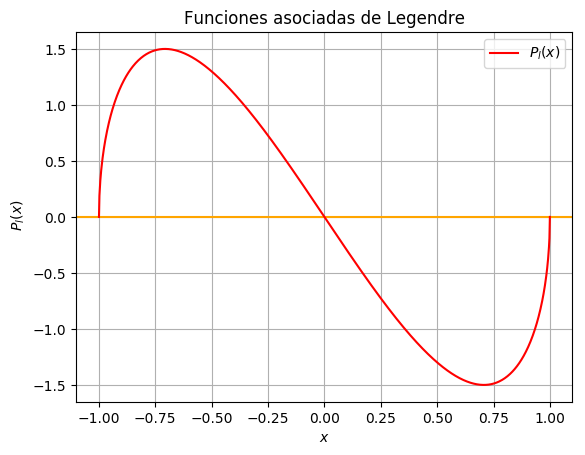

In [72]:
#Podemos comparar las gráficas obtenidas con las que se muestran de forma on-line [8][9]
#Conjuntos de datos
x = linspace(-1.0, 1.0, 1000)

l=2
m=1

y=[]
for i=1:length(x)
    yy= sf_legendre_Plm(l,m,x[i])
    y=push!(y,yy)        
end 

#Gráfica

fig,ax = subplots()
#ax[:set_ylim](-1, 2.0)
#ax[:set_xlim](-1, 1.0)
title("Funciones asociadas de Legendre")#Título de la gráfica
xlabel("\$x\$") #Etiqueta para el eje X
ylabel(" \$P_l (x)\$")#Etiqueta para el eje Y
 
axhline(0, color="orange") 
grid()

plot(x,y,label="\$P_{l}(x)\$",color="red") #label=r"$P_{}(x)$".format(n)
 
legend(loc="best")
show()

In [7]:
function armonico(l,m,t,phi)
    
    x=cos(t)
    
    p=sf_legendre_Plm(l,m,x)
    
    num=(2*l+1)*(factorial(l-m))
    den=(4*pi)*(l+m)
    
    Y=sqrt(num/den)*p*exp(im*m*phi)   
    return Y
end    

armonico (generic function with 1 method)

In [25]:
armonico(1,0,0,2)

0.4886025119029199 + 0.0im

In [27]:
theta=linspace(-1.0, 1.0, 100);
phi=linspace(0.0,2*pi, 100)

100-element LinSpace{Float64}:
 0.0,0.0634665,0.126933,0.1904,0.253866,…,6.09279,6.15625,6.21972,6.28319

In [35]:
armonico(1,1,1,0.126)

-0.2884185921814218 - 0.0365342870020377im

In [42]:
z=zeros(100);
phi=linspace(0.0,2*pi,100)

for i=1:100
    z[i]=armonico(1,1,pi,phi[i])
end
z

100-element Array{Float64,1}:
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
  ⋮  
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0

In [17]:
m=zeros(100,100) 


for i=1:100
    for j=1:100
        m[i]=armonico(1,1,theta[i],phi[j])
    end
end

LoadError: InexactError()

In [47]:
m=zeros(3,3) 


3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [53]:
m[1]=1;m[2]=2;m[3]=3;m[4]=4;

4

In [54]:
m

3×3 Array{Float64,2}:
 1.0  4.0  0.0
 2.0  0.0  0.0
 3.0  0.0  0.0

In [7]:
function af_legendre2(ll,m,x)
    
    l=ll+1
    p=zeros(l)
    
   p[1]=sf_legendre_Plm(1,m,x)
   p[2]=sf_legendre_Plm(2,m,x)
    
    if l==1
        
        return p[1]
        
    elseif l==2
        
        return p[2]
        
    else

        for i=3:l
            p[i]=((2(i-2)+1)*x*sf_legendre_Plm(i-1,m,x)-((i-2)+m)sf_legendre_Plm(i-2,m,x))/((i-2)-m+1)
            #p[i]=((2(i-1)+1)*x*sf_legendre_Plm(i-1,m,x)-((i-1)+m)*sf_legendre_Plm(l-2,m,x))/((i-1)-m+1)
            #p[i]=((2(i-2)+1)*x*p[i-1]-((i-2)+m)p[i-2])/((i-2)-m+1)
            #p[i]=(((2*i))*x*p[i-1]-(i-1)*p[i-2])/(i+1)
        end

        return p
    end
    
    
    
end    

af_legendre2 (generic function with 1 method)

In [52]:
sf_legendre_Plm(,0,1)

1.0

In [53]:
af_legendre2(2,0,0)

-0.5

In [19]:
acos(0.5)

1.0471975511965979

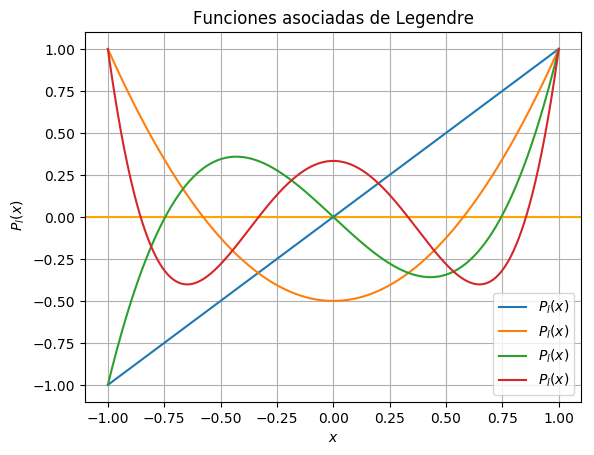

In [68]:
x = linspace(-1.0, 1.0, 1000)
l=3
m=0
y=[]
for i=1:length(x)
    yy= af_legendre2(l,m,x[i])
    y=push!(y,yy)        
end 

#Gráfica

fig,ax = subplots()
#ax[:set_ylim](-1, 2.0)
#ax[:set_xlim](-1, 1.0)
title("Funciones asociadas de Legendre")#Título de la gráfica
xlabel("\$x\$") #Etiqueta para el eje X
ylabel(" \$P_l (x)\$")#Etiqueta para el eje Y
 
axhline(0, color="orange") 
grid()

plot(x,y,label="\$P_{l}(x)\$") #label=r"$P_{}(x)$".format(n)
 
legend(loc="best")
show()

# Aplicación 2

Analizaremos el caso de las temperaturas estaccionarias en una esfera [10]

# Referencias


* [1] http://www.frsn.utn.edu.ar/GIE/AN/IN/Polinomios_Legendre.pdf
* [2] http://la-mecanica-cuantica.blogspot.mx/2009/08/polinomios-de-legendre-aspectos.html
* [3] Griffiths, D.J., 1995 Introduction to quantum mechanics, Prentice-Hall,Englewood Cliffs,NJ. pp 121-128 : http://www.fisica.net/quantica/Griffiths%20-%20Introduction%20to%20quantum%20mechanics.pdf
* https://stackoverflow.com/questions/36816537/spherical-coordinates-plot-in-matplotlib
* [4] http://mathworld.wolfram.com/Condon-ShortleyPhase.html
* [5] George B. Arfken. (2005). Mathematical Methods for Physicists. Boston: Elsevier pp 788-789: https://www.google.com.mx/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwik4cnsr-bUAhXFNiYKHVI7Db0QFggiMAA&url=https%3A%2F%2Ffaculty.psau.edu.sa%2Ffiledownload%2Fdoc-3-pdf-7495bfe3bcb0defae0b795cb11c19e13-original.pdf&usg=AFQjCNGYnHlZBczhActxYGECFoQupaF-GA
* [6] http://www.scielo.org.co/pdf/racefn/v37n145/v37n145a09.pdf
* [7] http://pythology.blogspot.mx/2015/10/spherical-harmonic-polar-and-equatorial.html?m=1
* [8] http://functions.wolfram.com/webMathematica/FunctionPlotting.jsp?name=LegendreP2General
* [9] http://keisan.casio.com/exec/system/1180573406
* [10] http://www.uru.edu/fondoeditorial/articulos/LEGENGRE.pdf
* [11] http://mathworld.wolfram.com/SphericalCoordinates.html
* [12] Robert Eisberg, Robert Resnick. (1985). Quantum Physics of Atoms, Molecules, Solids, Nuclei, and Particles. New York, United States: John Wiley & Sons Inc.Appendix N : http://caos.fs.usb.ve/libros/Modern/Eisberg%20R.%20and%20R.%20Resnick%20-%20Quantum%20Physics%20Of%20Atoms,%20Molecules,%20Solids,%20Nuclei,%20And%20Particles.pdf
* [13] p336: http://www.astro.caltech.edu/~srk/Ay126/Lectures/Lecture3/SchrodingerModel.pdf 
* [14] George B. Arfken, Hans J. Weber, Frank E. Harris. (2013). Mathematical Methods for Physicists: A Comprehensive Guide. Boston: Elsevier,Academic Pr. pp 741
* [15] Larry C Andrews. (1985). Special Functions for Engineers and Applied Mathematics . USA: Macmillan . p161-162

In [1]:
sqrt(2)

1.4142135623730951

In [5]:
factorial(3)

6